# Project: Communicate data findings(Ford GoBike System Data)

## Made by : Yasmine Hussein
### Date : Mar 2021

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction

>This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

> **Questions to be answered**:
- What is the number of custmers and subscribers?
- Maximum duration for each user type
- What is the most popular start station?
- Which gender is  most riding bikes? 
- weekly trips
- User type split for GoBike sharing system
- Weekly usage of the bike share system per user type
- Gender population for user type
- Hourly usage during the weekday for customers and subscribers



In [1]:
# Import statements for all of the packages that planned to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

## Gathering Data
### Ford GoBike System Data

In [2]:
# loading data in dataframe

df = pd.read_csv('fordgobike.csv')

# summary of the data

print(df.shape)
print(df.info())
df.head()

(183412, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  floa

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [3]:
# check for duplicates

df.bike_id.duplicated().sum()

178766

In [4]:
# drop duplicates

df.bike_id.drop_duplicates(inplace= True)
# check again
df.bike_id.duplicated().sum()

0

In [5]:
# check for null values

df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [6]:
# drop NAN values

df.dropna(inplace= True)

# check again
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [7]:
# drop unneccessary columns

print(df.columns)

df.drop(columns=['start_station_latitude','start_station_longitude', 'end_station_latitude', 'end_station_longitude'], inplace=True)

df.info()

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   end_station_id           174952 non-null  float64
 6   end_station_name         174952 non-null  object 
 7   bike_id           

In [8]:
# fixing date-time variables

df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)
df.member_birth_year= df.member_birth_year.astype('int64')
df.start_station_id= df.start_station_id.astype('int64')
df.end_station_id= df.end_station_id.astype('int64')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  int64         
 4   start_station_name       174952 non-null  object        
 5   end_station_id           174952 non-null  int64         
 6   end_station_name         174952 non-null  object        
 7   bike_id                  174952 non-null  int64         
 8   user_type                174952 non-null  object        
 9   member_birth_year        174952 non-null  int64         
 10  member_gender            174952 non-null  object        
 11  bike_share_for_all_trip  174952 non-null  object        
dtypes: datetime64[ns

In [9]:
# adding month column

df['weekday']= df.start_time.dt.day_name()
df['hour']= df.start_time.dt.hour

In [10]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,weekday,hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),13,Commercial St at Montgomery St,4902,Customer,1984,Male,No,Thursday,17
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,3,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,No,Thursday,12
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,70,Central Ave at Fell St,6638,Subscriber,1989,Other,No,Thursday,17
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,222,10th Ave at E 15th St,4898,Subscriber,1974,Male,Yes,Thursday,23
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,323,Broadway at Kearny,5200,Subscriber,1959,Male,No,Thursday,23


<a id='eda'></a>
## Exploratory Data Analysis



### What is the number of custmers and subscribers?

In [11]:
df.user_type.value_counts()

Subscriber    158386
Customer       16566
Name: user_type, dtype: int64

### Maximum duration for each user type

In [12]:
df.groupby('user_type')['duration_sec'].max()

user_type
Customer      83519
Subscriber    84548
Name: duration_sec, dtype: int64

### What is the most popular start station?

In [13]:
df.start_station_name.mode()

0    Market St at 10th St
dtype: object

### Which gender is  most riding bikes?

In [14]:
df.member_gender.mode()

0    Male
dtype: object

## Univariate Exploration

#### weekly trips

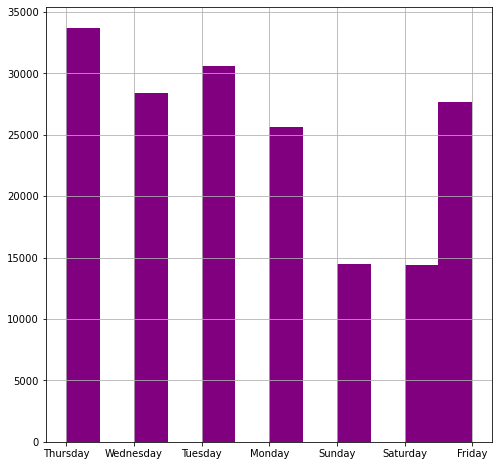

In [15]:
df.weekday.hist(color='purple', figsize=(8,8), bins=12);

The bike share system is mainly used during weekdays, with Tuesday - Thursday as the most popular days for bike rides. The system is most probably used as a daily work/school commute.

#### hourly usege of the bike sharing system

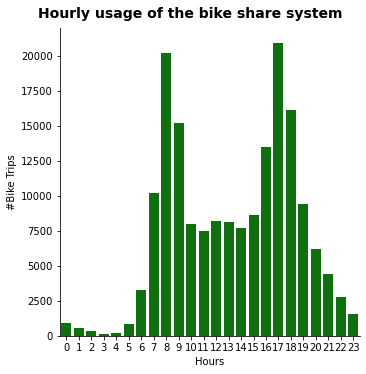

In [16]:

# hourly usege of the bike sharing system

g = sb.catplot(data=df, x='hour', kind='count', color = 'green')
g.set_axis_labels("Hours", "#Bike Trips")
g.fig.suptitle('Hourly usage of the bike share system', y=1.03, fontsize=14, fontweight='semibold');

The hourly distribution is bimodal, the system is used mainly around 8-9am and 5-6pm when people get to and gat back from work.

#### The (histogram) duration (sec) distribution per user type

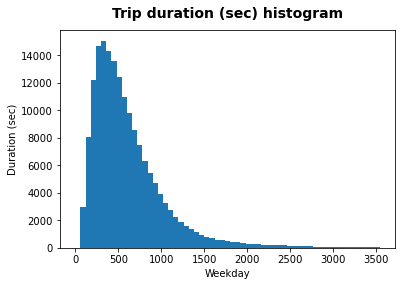

In [17]:
# code for the (histogram) duration (sec) distribution per user type

bin_edges = np.arange(0, 3600,60)

plt.hist(data = df, x = 'duration_sec', bins = bin_edges)

plt.title("Trip duration (sec) histogram", y=1.03, fontsize=14, fontweight='semibold')
plt.xlabel('Weekday')
plt.ylabel('Duration (sec)');


Looking at the histogram, we can see that trip durations are no longer than 30 min (1800 sec) and usually last 6 to 15 min. This can be explained by two facts:

The way the system works: single trips and 24h or 72h access pass are free of additional charge for trips up to 30 min, otherwise you pay extra $3 for additional 15 min. Only the monthly pass offers free of charge 45 min rides.
The way the system is used: as is looks like people use the system for commuting, they trips are usually short in time probably due to the closeness of their homes to workplace/school.

## Bivariate Exploration

#### User type split for GoBike sharing system

In [18]:
# calculating % split for the user type
customer = df.query('user_type == "Customer"')['bike_id'].count()
subscriber = df.query('user_type == "Subscriber"')['bike_id'].count()

customer_proportion = customer / df['bike_id'].count()
subscriber_proportion = subscriber / df['bike_id'].count()

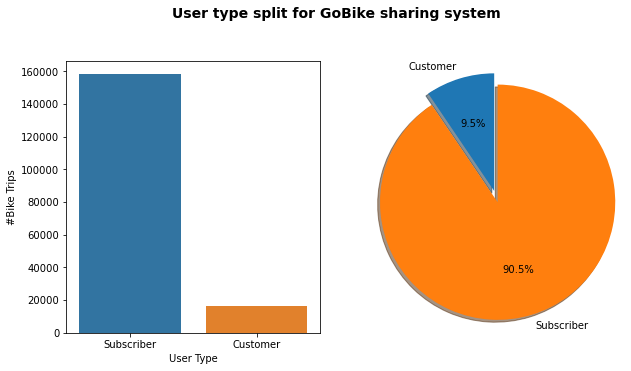

In [19]:
plt.figure(figsize = [10, 5])

# code for the bar chart
plt.subplot(1, 2, 1)

g = sb.countplot(data=df, x="user_type", order=df.user_type.value_counts().index)
g.set_xlabel('User Type')
g.set_ylabel('#Bike Trips')

# code for the pie chart
plt.subplot(1, 2, 2)

labels = ['Customer', 'Subscriber']
sizes = [customer_proportion, subscriber_proportion]
colors = sb.set_palette("colorblind")
explode = (0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors = colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')

plt.suptitle('User type split for GoBike sharing system', y=1.03, fontsize=14, fontweight='semibold');


The bike sharing system is mainly used by subscribers (90%) than ocassional riders (10%)

#### Weekly usage of the bike share system per user type

<Figure size 1080x360 with 0 Axes>

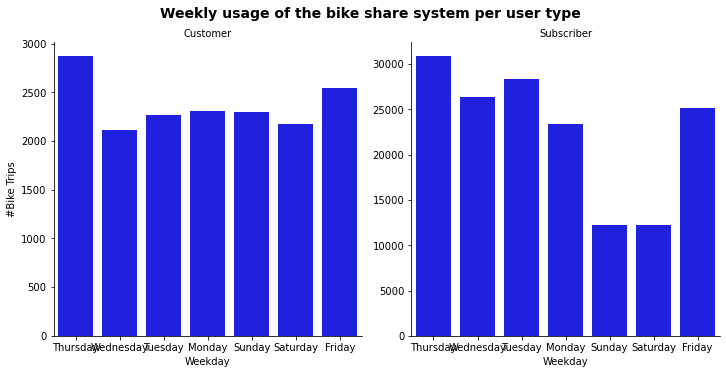

In [20]:
# weekday usege of the bike sharing system per user type
plt.figure(figsize = [15, 5])
g = sb.catplot(data=df, x='weekday', col="user_type", kind='count', sharey = False,
            color = "blue")
g.set_axis_labels("Weekday", "#Bike Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Weekly usage of the bike share system per user type', y=1.03, fontsize=14, fontweight='semibold');


There is a different trend on which days customers and subscribers rent bikes. As mentioned above customers are most probably occasional riders and tourist who use the bike sharing system on holiday or weekend trips. On the other hand, subscribers are most probably daily work/school commuters who use the system within a week.

#### hourly usege of the bike sharing system per user type

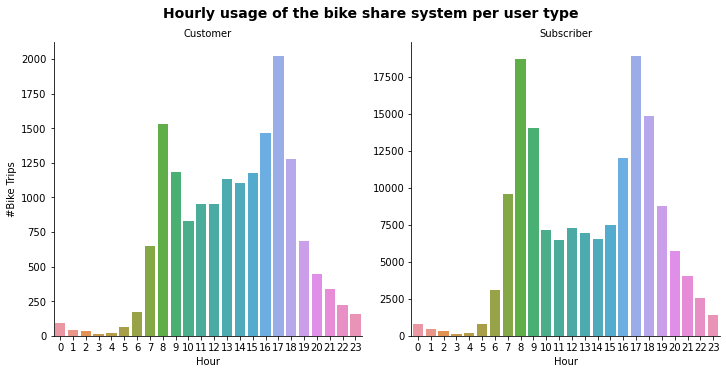

In [21]:
# hourly usege of the bike sharing system per user type

g = sb.catplot(data=df, x='hour', col="user_type", kind='count', sharey = False,
            color = colors)
g.set_axis_labels("Hour", "#Bike Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Hourly usage of the bike share system per user type', y=1.03, fontsize=14, fontweight='semibold');


There is also a different trend of when during the day bikes are rented most often. Customers use bikes mainly between 8 am - 7 pm, reaching the renting peak around 5pm. Subscribers on the other side use the system at around 8-9am and 5-6pm when they go and come back from work.

In [22]:
####  The trip duration varies between customers and subscribers

C:\Users\user1\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


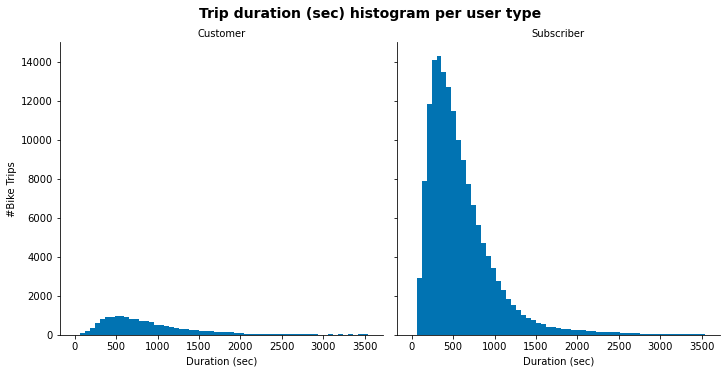

In [23]:
# code for the (histogram) duration (sec) distribution per user type

g = sb.FacetGrid(df, col="user_type", margin_titles=True, size=5)
bin_edges = np.arange(0, 3600,60)
g.map(plt.hist, "duration_sec", color=sb.set_palette("muted"), bins=bin_edges)
g.set_axis_labels("Duration (sec)", "#Bike Trips")
g.set_titles(col_template = '{col_name}')
g.fig.suptitle('Trip duration (sec) histogram per user type', y=1.03, fontsize=14, fontweight='semibold');

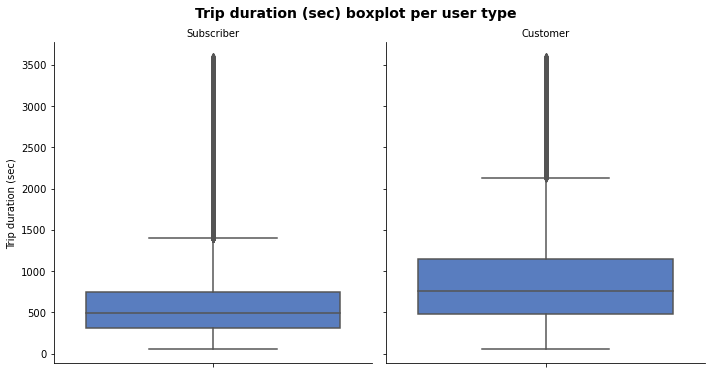

In [24]:
# code for the (boxplot) duration (sec) distribution per user type

data = df.query('duration_sec < 3600')
g = sb.catplot(data=data, y='duration_sec', col="user_type", kind='box',
            color = colors)
g.set_titles(col_template = '{col_name}')
g.set_axis_labels("", "Trip duration (sec)")
g.fig.suptitle('Trip duration (sec) boxplot per user type', y=1.03, fontsize=14, fontweight='semibold');


Looking at both charts (histograms and box plots), we can see that trip durations are longer for customers (9 to 23 minutes) than for subscribers (7 to 13 minutes). This can probably be explained by the fact that subscribers are mainly commuters who take short trips to work/school rather than longer trips around the Bay Area.

## Multivariate Exploration

#### Gender population for user type

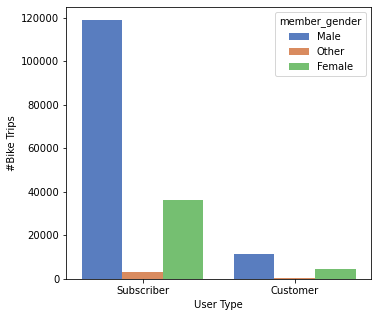

In [25]:
# code for the bar chart

plt.figure(figsize = [12, 5])
plt.subplot(1, 2, 1)

g = sb.countplot(data=df, x="user_type", hue="member_gender", order=df.user_type.value_counts().index)
g.set_xlabel('User Type')
g.set_ylabel('#Bike Trips');

In general, males are using the system more often than females and others (the registration system allows you to choose 'Other' as a gender). However, the ratio is much smaller between males and females for customers (more ore less 2:1) than for subscribers (3:1).

#### weekday usege of the bike sharing system per user type and gender

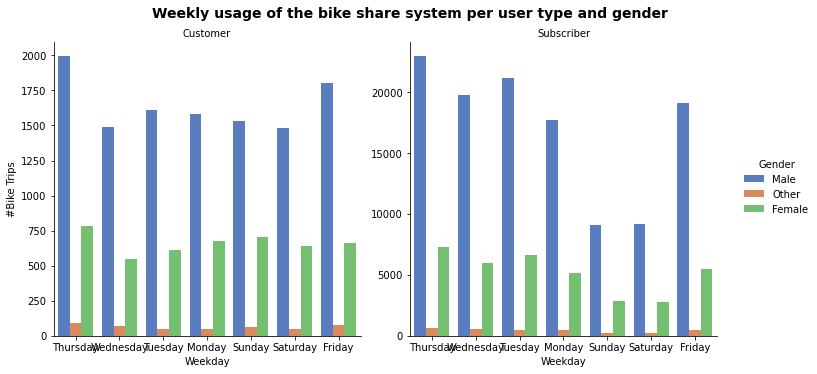

In [26]:
# weekday usege of the bike sharing system per user type and gender

g = sb.catplot(data=df, x='weekday', col="user_type", hue='member_gender', kind='count', sharey = False)
g.set_axis_labels("Weekday", "#Bike Trips")
g._legend.set_title('Gender')
g.set_titles("{col_name}")
g.fig.suptitle('Weekly usage of the bike share system per user type and gender', y=1.03, fontsize=14, fontweight='semibold');


As in the previous section, the trend is very similar for males and females: customers use the system more often during weekends than within a week (although the jump in bike used on weekends is much higher for females than for males); subscribers use the system mainly within a week.

#### hourly usege of the bike sharing system per user type and gender

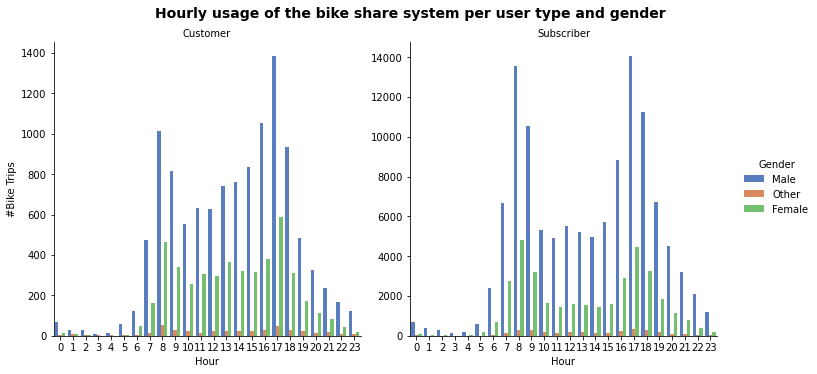

In [27]:
# hourly usege of the bike sharing system per user type and gender

g = sb.catplot(data=df, x='hour', col="user_type", hue='member_gender', kind='count', sharey = False)
g.set_axis_labels("Hour", "#Bike Trips")
g._legend.set_title('Gender')
g.set_titles("{col_name}")
g.fig.suptitle('Hourly usage of the bike share system per user type and gender', y=1.03, fontsize=14, fontweight='semibold');

During the day, both males and females use the system the same way: customers use bikes mainly between 8 am - 7 pm; subscribers on the other side use the system at around 8-9am and 5-6pm when they go and come back from work.

#### the (violinplot) duration (sec) distribution per user type and gender

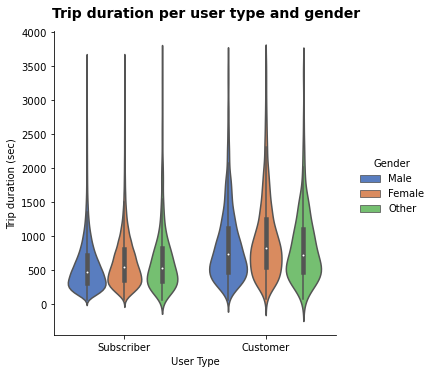

In [28]:
# code for the (violinplot) duration (sec) distribution per user type and gender

g = sb.catplot(data=data, x='user_type', y="duration_sec", hue="member_gender", kind="violin")

g.set_axis_labels("User Type", "Trip duration (sec)")
g._legend.set_title('Gender')
g.fig.suptitle('Trip duration per user type and gender', y=1.03, fontsize=14, fontweight='semibold');


Here we can observe that in both cases, females take longer trips (measured in time) than males and other. The difference is more visible for customers (~13 min for males and other vs ~15 for females) than for subscribers (the difference is quite small).

#### Hourly usage during the weekday for customers and subscribers

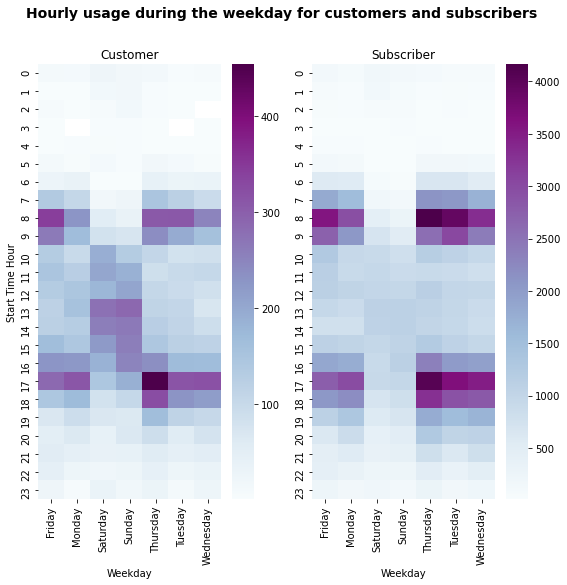

In [29]:

plt.figure(figsize=(9,8))
plt.suptitle('Hourly usage during the weekday for customers and subscribers', fontsize=14, fontweight='semibold')

# heatmap for customers
plt.subplot(1, 2, 1)
df_customer = df.query('user_type == "Customer"').groupby(["hour", "weekday"])["bike_id"].size().reset_index()
df_customer = df_customer.pivot("hour", "weekday", "bike_id")
sb.heatmap(df_customer, cmap="BuPu")

plt.title("Customer", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('Start Time Hour')

# heatmap for subscribers
plt.subplot(1, 2, 2)
df_subscriber = df.query('user_type == "Subscriber"').groupby(["hour", "weekday"])["bike_id"].size().reset_index()
df_subscriber = df_subscriber.pivot("hour", "weekday", "bike_id")
sb.heatmap(df_subscriber, cmap="BuPu")

plt.title("Subscriber", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('');


The plot perfectly summarizes in one place the diffrent trends for customers and subscribers I was writing up before.

Customers use the bike sharing system more often on weekends:
weekdays: most bike rides happen around 8-9am and 5-6pm with the peak on Fridays around 5pm
weekends: most bike rides happen between 10am - 8pm with the peak on Saturdays around 2pm
Subscribers use the bike sharing system mainly on weekdays:
weekdays: most bike rides hapen around 8-9am and 5-6pm with the peak on Tuesdays around 8am
weekends: bikes are still rented but there is a significant drop in numbers of rented bikes throughout the entire weekends

<a id='conclusions'></a>
## Conclusions:

>
 - Subscribers is more than customers user type.
 - Maximum duration for both user types is almost the same.
 - Market St at 10th St is the most popular start station.
 - Males are the most riders for bikes.
 - Tuesday - Thursday as the most popular days for bike rides.
 - Subscriber user type using GoBike sharing system more than customers.
 - Most of riders use the Gobike sharing system in weekdays specially thursdays.
 - Generaly Males are the most popular riders.
 - Most bike rides happen around 8-9am and 5-6pm for all users type.
 